In [27]:
import requests
api_addr = "https://graph.facebook.com/v2.4/me"
token = "CAACEdEose0cBAOVUelLpyjZA2ZApZATIizj7hYxuGnLUmb6cb0xD9vSe5y45DIW1kPpDPmUe7mgsJZAAnD2kZCchiXaA8fx3ji3G49lMhZCdAGcmjzBptPQAZAH2hSL3NtcjMSQCiqi7lz75NrZByWQiirZBbgZB8sVZBXA2JI9pKASy8czUN6yQ0wvet4m2ncatmNOmzNkOnLJ1vUByJAH85pk"
qs = {"metadata":1,
     "access_token":token}
res = requests.get(api_addr,params=qs,verify=False)

c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
c:\python27\lib\site-packages\requests\packages\urllib3\connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [28]:
meta = res.json()
meta.keys()

[u'id', u'name', u'metadata']

In [29]:
meta['metadata']

{u'connections': {u'accounts': u'https://graph.facebook.com/831654370182439/accounts?access_token=CAACEdEose0cBAOVUelLpyjZA2ZApZATIizj7hYxuGnLUmb6cb0xD9vSe5y45DIW1kPpDPmUe7mgsJZAAnD2kZCchiXaA8fx3ji3G49lMhZCdAGcmjzBptPQAZAH2hSL3NtcjMSQCiqi7lz75NrZByWQiirZBbgZB8sVZBXA2JI9pKASy8czUN6yQ0wvet4m2ncatmNOmzNkOnLJ1vUByJAH85pk',
  u'achievements': u'https://graph.facebook.com/831654370182439/achievements?access_token=CAACEdEose0cBAOVUelLpyjZA2ZApZATIizj7hYxuGnLUmb6cb0xD9vSe5y45DIW1kPpDPmUe7mgsJZAAnD2kZCchiXaA8fx3ji3G49lMhZCdAGcmjzBptPQAZAH2hSL3NtcjMSQCiqi7lz75NrZByWQiirZBbgZB8sVZBXA2JI9pKASy8czUN6yQ0wvet4m2ncatmNOmzNkOnLJ1vUByJAH85pk',
  u'ad_export_presets': u'https://graph.facebook.com/831654370182439/ad_export_presets?access_token=CAACEdEose0cBAOVUelLpyjZA2ZApZATIizj7hYxuGnLUmb6cb0xD9vSe5y45DIW1kPpDPmUe7mgsJZAAnD2kZCchiXaA8fx3ji3G49lMhZCdAGcmjzBptPQAZAH2hSL3NtcjMSQCiqi7lz75NrZByWQiirZBbgZB8sVZBXA2JI9pKASy8czUN6yQ0wvet4m2ncatmNOmzNkOnLJ1vUByJAH85pk',
  u'adaccountgroups': u'https://graph.faceb

In [30]:
def getAllLikes1(token, node):
    result = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % node
    qs = {"fields": "name", 
          "access_token": token}
    r = requests.get(api_addr, params=qs)
    res = r.json()
    if not len(res["data"]):
        return result
    else:
        result += res["data"]
        while "next" in res["paging"]:
            cursor_next = res["paging"]["cursors"]["after"]
            qs["after"] = cursor_next
            r = requests.get(api_addr, params=qs)
            res = r.json()
            result += res["data"]
        return result


In [31]:
token = "CAACEdEose0cBAFl4TrIC5grVQRqAN1U7ZCrZCrliX9pv6ZCrrc7iHIZCBcsZBhJQ9PZAETlZA4ufZBQkazYpIf6QS3GYhigcyThViUZCUtme2b1p5QFX8Is78eg6OcZAFlZCvaK0ZAcELJKiZBBwbgqZCM48KshAJxxLanteEiBfm3nXmlxLCAPVjtPs4QMRJXZAnkVxFrfw0xbCbYHchk5p2OjSEOk"
node = "831654370182439_1149178338430039"
getAllLikes1(token,node)

c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


[{u'id': u'875172679172116', u'name': u'\u6c5f\u884d\u90c1'},
 {u'id': u'10200890096534641', u'name': u'Steven Lee'},
 {u'id': u'1633157530', u'name': u'\u4faf\u4f73\u5f63'},
 {u'id': u'10202474101000844', u'name': u'\u5433\u601d\u7d43'}]

In [19]:
class likerCrawler:
    # need a user id and a starting time
    def __init__(self, user, since, token): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        
    # need a helper to convert datetime string to timestamp
    def str2Timestamp(): pass
    
    # need a function to crawl all post id in a given time
    def getPostId(): pass
    
    # need a function to crawl all like info given a post id
    def getLikes(): pass

In [20]:
import requests
import datetime, time

class likerCrawler:
    """a FB Graph API crawler to get all like info associated with posts since a given time"""
    def __init__(self, user, since, token, tfmt="%Y-%m-%d"): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        self.tfmt = str(tfmt)
        
    def getTimestamp(self):
        """convert datetime string to UNIX timestamp"""
        return int(time.mktime(datetime.datetime.strptime(self.since, self.tfmt).timetuple()))
        
    def getPostIdwithTimestamp(self): 
        """given user_id and start time, return a list of {post_id, time}"""
        posts = []
        api_addr = "https://graph.facebook.com/v2.4/%s/posts" % self.user
        qs = {"since": self.getTimestamp(), "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if not len(res["data"]):
            return None
        else: 
            posts += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            while "paging" in res and next in res["paging"]:
                res = requests.get(res["paging"]["next"]).json()
                post_ids += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            return posts

    def getLikesPerPost(self, post_id):
        """given a post id, return all user id/name liked it with timestamp"""
        like_users = []
        api_addr = "https://graph.facebook.com/v2.4/%s" % post_id
        qs = {"fields": "likes.fields(name),created_time", "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if "likes" not in res:
            return None
        else:
            ts = res["created_time"]
            like_users += res["likes"]["data"]
            while "paging" in res and "next" in res["paging"]:
                res = requests.get(next).json()
                like_users += res["data"]
            return ts, like_users
        
    def getAllLikes(self):
        all_likes = [ self.getLikesPerPost(d) for d in self.all_posts ]
        return [ l for l in all_likes if l is not None]
    
    @property
    def all_posts(self):
        return [ m["id"] for m in self.getPostIdwithTimestamp() ]

In [21]:
mycrawler = likerCrawler(user = "me",
                        since = "2014-01-01",
                        token = "CAACEdEose0cBAFl4TrIC5grVQRqAN1U7ZCrZCrliX9pv6ZCrrc7iHIZCBcsZBhJQ9PZAETlZA4ufZBQkazYpIf6QS3GYhigcyThViUZCUtme2b1p5QFX8Is78eg6OcZAFlZCvaK0ZAcELJKiZBBwbgqZCM48KshAJxxLanteEiBfm3nXmlxLCAPVjtPs4QMRJXZAnkVxFrfw0xbCbYHchk5p2OjSEOk")


In [22]:
mycrawler.getTimestamp()

1388505600

In [23]:
mycrawler.getPostIdwithTimestamp()

c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


[{'id': u'831654370182439_1149870118360861',
  'ts': u'2015-10-02T13:38:37+0000'},
 {'id': u'831654370182439_1149178338430039',
  'ts': u'2015-10-01T07:49:46+0000'},
 {'id': u'831654370182439_1142354679112405',
  'ts': u'2015-09-18T13:17:45+0000'},
 {'id': u'831654370182439_1136213573059849',
  'ts': u'2015-09-08T13:20:09+0000'},
 {'id': u'831654370182439_1133005830047290',
  'ts': u'2015-09-03T00:09:29+0000'},
 {'id': u'831654370182439_1132119806802559',
  'ts': u'2015-09-01T10:11:05+0000'},
 {'id': u'831654370182439_1132018693479337',
  'ts': u'2015-09-01T04:46:02+0000'},
 {'id': u'831654370182439_1131312176883322',
  'ts': u'2015-08-31T03:57:40+0000'},
 {'id': u'831654370182439_1126969107317629',
  'ts': u'2015-08-24T10:39:15+0000'},
 {'id': u'831654370182439_1123492027665337',
  'ts': u'2015-08-18T09:54:39+0000'},
 {'id': u'831654370182439_1123387134342493',
  'ts': u'2015-08-18T03:44:49+0000'},
 {'id': u'831654370182439_1122816261066247',
  'ts': u'2015-08-17T04:43:28+0000'},
 {'i

In [24]:
mycrawler.getLikesPerPost("831654370182439_1112242155456991")

c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


(u'2015-07-30T13:17:09+0000',
 [{u'id': u'831654370182439', u'name': u'\u9673\u4e00\u5b8f'},
  {u'id': u'885984991415834', u'name': u'Wen Hung'},
  {u'id': u'856462491043511', u'name': u'\u9673\u5929\u8056'},
  {u'id': u'1633157530', u'name': u'\u4faf\u4f73\u5f63'},
  {u'id': u'1081698645180059', u'name': u'\u674e\u51a0\u752b'},
  {u'id': u'10203821234397314', u'name': u'\u6797\u8349\u8393'},
  {u'id': u'992212170795504', u'name': u'Roussas Wu'},
  {u'id': u'1126670230682973', u'name': u'Skusi Ko'},
  {u'id': u'10203363035984957', u'name': u'Charlie Mai'},
  {u'id': u'721295257890942', u'name': u'Guo-siang Liu'},
  {u'id': u'992866600726716', u'name': u'Joan Hsu'}])

In [25]:
all_likes = mycrawler.getAllLikes()
all_likes[:2]

c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
c:\python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail.

[(u'2015-10-02T13:38:37+0000',
  [{u'id': u'920318287992653', u'name': u'Scott Hou'},
   {u'id': u'10200890096534641', u'name': u'Steven Lee'}]),
 (u'2015-10-01T07:49:46+0000',
  [{u'id': u'875172679172116', u'name': u'\u6c5f\u884d\u90c1'},
   {u'id': u'10200890096534641', u'name': u'Steven Lee'},
   {u'id': u'1633157530', u'name': u'\u4faf\u4f73\u5f63'},
   {u'id': u'10202474101000844', u'name': u'\u5433\u601d\u7d43'}])]

In [32]:
# tidy likers into list of (time, name)
def decoratebyTimeUnit(by):
    def byTimeUnit(dtstr):
        # %z not support in python...
        dt = datetime.datetime.strptime(dtstr, "%Y-%m-%dT%H:%M:%S+0000")
        if by == "date":
            return dt.date()
        elif by == "month":
            return dt.replace(day=1, hour=0, minute=0, second=0).date()
        else:
            raise ValueError("Unknown by value")
    def real_decorator(func):
        def wrapper(likes):
            return [ (byTimeUnit(like[0]), like[1]) for like in func(likes) ]
        return wrapper
    return real_decorator
        
@decoratebyTimeUnit("month")
def countByTime(likes):
    res = []
    for t in likes:
        for m in t[1]:
            res.append((t[0], m["name"]))
    return res

In [33]:
likes = countByTime(all_likes)
likes[:10]

[(datetime.date(2015, 10, 1), u'Scott Hou'),
 (datetime.date(2015, 10, 1), u'Steven Lee'),
 (datetime.date(2015, 10, 1), u'\u6c5f\u884d\u90c1'),
 (datetime.date(2015, 10, 1), u'Steven Lee'),
 (datetime.date(2015, 10, 1), u'\u4faf\u4f73\u5f63'),
 (datetime.date(2015, 10, 1), u'\u5433\u601d\u7d43'),
 (datetime.date(2015, 9, 1), u'\u9673\u5929\u8056'),
 (datetime.date(2015, 9, 1), u'Marco Wang'),
 (datetime.date(2015, 9, 1), u'Shih-Han Chen'),
 (datetime.date(2015, 9, 1), u'\u6797\u7fa9\u61b2')]

In [34]:
from collections import Counter
import pandas as pd

# group by time only
monthly_like_counts = Counter([ t[0] for t in likes ])
df = pd.DataFrame(monthly_like_counts.items())
df.columns = ["time", "count"]
df = df.sort("time")
df

,time,count
2,2015-03-01,22
6,2015-05-01,25
3,2015-06-01,4
4,2015-07-01,64
1,2015-08-01,30
0,2015-09-01,24
5,2015-10-01,6


In [37]:
# group by time by liker
monthly_like_counts_by_liker = [ (t[0][0], t[0][1], t[1]) for t in Counter(likes).items() ]
df2 = pd.DataFrame(monthly_like_counts_by_liker)
df2.columns = ["time", "liker", "count"]
df2 = df2.sort(["liker", "time"])
df2[:6]

,time,liker,count
111,2015-09-01,Alice Chou,1
0,2015-03-01,Blas Rodriguez,1
17,2015-08-01,Cassie Chen,1
45,2015-07-01,Charlie Mai,1
59,2015-03-01,Chi-Fan Hsieh,1
2,2015-05-01,Chi-Fan Hsieh,1


In [40]:
# get top 10 likers
df2_count_by_liker = df2.groupby("liker").sum()
df2_count_by_liker[:6]

,count
liker,
Alice Chou,1
Blas Rodriguez,1
Cassie Chen,1
Charlie Mai,1
Chi-Fan Hsieh,2
Chia-Hui Chen,1


In [42]:
top_likers = list(df2_count_by_liker.sort("count", ascending=0).index[:6])
top_likers

[u'\u9673\u5929\u8056',
 u'Steven Lee',
 u'\u9673\u4e00\u5b8f',
 u'Roussas Wu',
 u'\u5b6b\u77c7\u77c7',
 u'\u90ed\u5bb6\u665f']

In [43]:
# keep only top 5 likers' data
df2_filtered = df2[df2["liker"].isin(top_likers)]

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

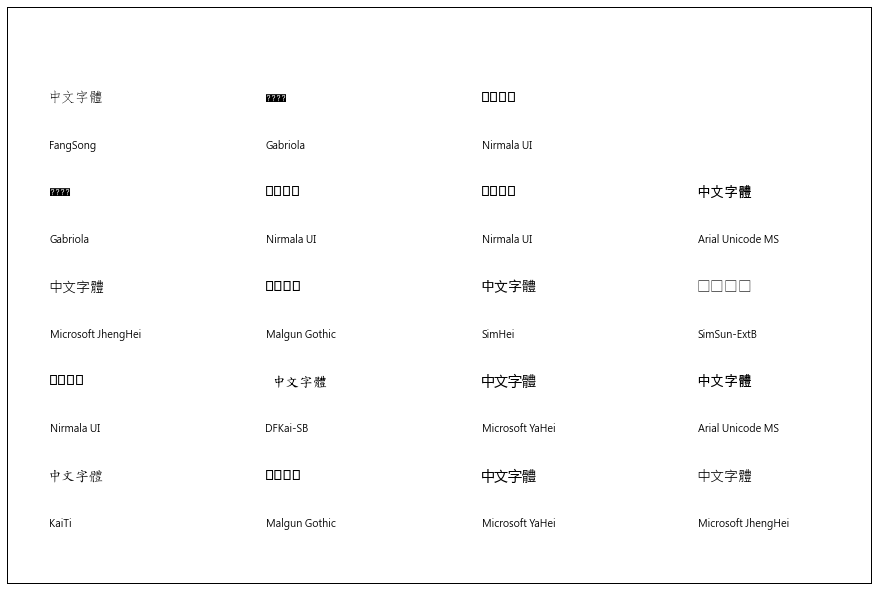

In [46]:
# run the following code to show all available Chinese font family on your computer
from matplotlib.font_manager import fontManager 
import os 
 
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
plt.subplots_adjust(0, 0, 1, 1, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, u"中文字體", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
# plt.show() # not necessary in ipython notebook

In [47]:
# let's make a playground!
import re

test_str = ["kyle chung; (02)2256-1116; New Taipei City",
            "Mr. Funghi,Earth Anywhere, 07-21180293",
            "free tel: 0800 000 123 #1234",
            "Dr.A (not Dr.B) street no.123 2945 1412"]

def findFirstMatched(pattern, test_str=test_str):
    p = re.compile(pattern)
    print "\n=== result of findFirstMatched ==="
    for i, s in enumerate(test_str):
        m = p.search(s)
        if m:
            print "row %s:" % i, m.group()
        else:
            print "row %s: no match" % i
    return None

def findAllMatched(pattern, test_str=test_str):
    p = re.compile(pattern)
    print "\n=== result of findAllMatched ==="
    for i, s in enumerate(test_str):
        matched = p.findall(s)
        print "row %s: " % i, matched
    return None

In [48]:
# test first-matched

findFirstMatched("3")


=== result of findFirstMatched ===
row 0: no match
row 1: 3
row 2: 3
row 3: 3


In [49]:
# 2nd try: get all digits, not just one

for s in test_str:
    print s
    
findFirstMatched("[0-9]+")
findAllMatched("[0-9]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: 02
row 1: 07
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['02', '2256', '1116']
row 1:  ['07', '21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


In [50]:
for s in test_str:
    print s

findFirstMatched("[0-9-]+")
findAllMatched("[0-9-]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: 02
row 1: 07-21180293
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['02', '2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


In [51]:
for s in test_str:
    print s
    
findFirstMatched("[0-9-()]+")
findAllMatched("[0-9-()]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800
row 3: (

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['(', ')', '123', '2945', '1412']


In [52]:
for s in test_str:
    print s
findAllMatched(".")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['k', 'y', 'l', 'e', ' ', 'c', 'h', 'u', 'n', 'g', ';', ' ', '(', '0', '2', ')', '2', '2', '5', '6', '-', '1', '1', '1', '6', ';', ' ', 'N', 'e', 'w', ' ', 'T', 'a', 'i', 'p', 'e', 'i', ' ', 'C', 'i', 't', 'y']
row 1:  ['M', 'r', '.', ' ', 'F', 'u', 'n', 'g', 'h', 'i', ',', 'E', 'a', 'r', 't', 'h', ' ', 'A', 'n', 'y', 'w', 'h', 'e', 'r', 'e', ',', ' ', '0', '7', '-', '2', '1', '1', '8', '0', '2', '9', '3']
row 2:  ['f', 'r', 'e', 'e', ' ', 't', 'e', 'l', ':', ' ', '0', '8', '0', '0', ' ', '0', '0', '0', ' ', '1', '2', '3', ' ', '#', '1', '2', '3', '4']
row 3:  ['D', 'r', '.', 'A', ' ', '(', 'n', 'o', 't', ' ', 'D', 'r', '.', 'B', ')', ' ', 's', 't', 'r', 'e', 'e', 't', ' ', 'n', 'o', '.', '1', '2', '3', ' ', '2', '9', '4', '5', ' ', '1', '4', '1', '2']


In [53]:
for s in test_str:
    print s
findFirstMatched(".")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: k
row 1: M
row 2: f
row 3: D


In [54]:
for s in test_str:
    print s
findAllMatched("[a-zA-Z]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['kyle', 'chung', 'New', 'Taipei', 'City']
row 1:  ['Mr', 'Funghi', 'Earth', 'Anywhere']
row 2:  ['free', 'tel']
row 3:  ['Dr', 'A', 'not', 'Dr', 'B', 'street', 'no']


In [55]:
import re

In [56]:
p = re.compile("test+")

In [57]:
p

re.compile(r'test+')

In [58]:
print p

In [59]:
p.match("123
        ")

SyntaxError: EOL while scanning string literal (<ipython-input-59-f239a6dfa54d>, line 1)

In [60]:
p.match("1243")

In [61]:
p.match("testtttt      ")

In [64]:
print "\\n a string\n"

\n a string



In [ ]:
re.compile("\.jpeg$")

In [65]:
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

1
2
3
